# Pytorch Basics

## Imports

In [1]:
#!pip3 install torch torchvision torchaudio
import numpy as np
from matplotlib import pyplot as plt

## 1. Simple NeuralNetwork with Pytorch

### 1.1. Basic Example with MSE Loss function (without Gradient Descent)

In [2]:
def forward(x):
    return x*w

def loss(x,y_true):
    y_pred = forward(x)
    return np.sum((y_pred - y_true)**2)/N

In [3]:
x = np.array([1,2,3,4],dtype=np.float32)
y_true = 2*x
x, y_true

(array([1., 2., 3., 4.], dtype=float32),
 array([2., 4., 6., 8.], dtype=float32))

In [4]:
N = len(x)
w = 0.5 # random weight

In [5]:
y_random = forward(x)
y_random

array([0.5, 1. , 1.5, 2. ], dtype=float32)

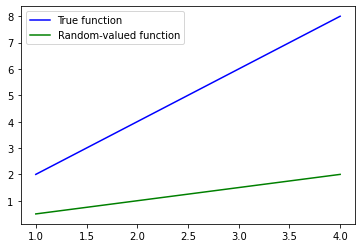

In [6]:
plt.plot(x,y_true, color="blue", label="True function")
plt.plot(x,y_random, color="green", label="Random-valued function")
plt.legend()

Loss calculation for w = 0.0
optimal: [2. 4. 6. 8.], x*w= [0. 0. 0. 0.], loss=30.0
[30.] [0.]
Loss calculation for w = 1.0
optimal: [2. 4. 6. 8.], x*w= [1. 2. 3. 4.], loss=7.5
[30.   7.5] [0. 1.]
Loss calculation for w = 2.0
optimal: [2. 4. 6. 8.], x*w= [2. 4. 6. 8.], loss=0.0
[30.   7.5  0. ] [0. 1. 2.]
Loss calculation for w = 3.0
optimal: [2. 4. 6. 8.], x*w= [ 3.  6.  9. 12.], loss=7.5
[30.   7.5  0.   7.5] [0. 1. 2. 3.]
Loss calculation for w = 4.0
optimal: [2. 4. 6. 8.], x*w= [ 4.  8. 12. 16.], loss=30.0
[30.   7.5  0.   7.5 30. ] [0. 1. 2. 3. 4.]


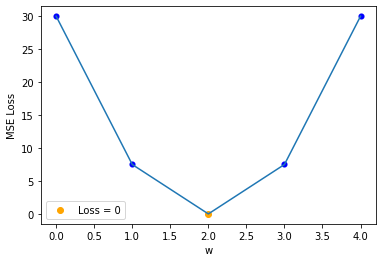

In [7]:
list_loss = np.array([])
list_w = np.array([])

for w in np.arange(0.0,5.0,1.0):
    print("Loss calculation for w =",w)
    y_pred = forward(x)
    l = loss(x,y_true)
    
    print(f"optimal: {y_true}, x*w= {y_pred}, loss={l}")
    
    if l == 0:
        plt.scatter(w,l, color="orange", label="Loss = 0")
    else:
        plt.scatter(w,l, color="blue", linewidths=0.1)
    
    list_loss = np.append(list_loss,[l])
    list_w = np.append(list_w,[w])
    print(list_loss, list_w)

plt.plot(list_w,list_loss)
plt.xlabel("w")
plt.ylabel("MSE Loss")
plt.legend()

In [8]:
print(list_loss, list_w)

[30.   7.5  0.   7.5 30. ] [0. 1. 2. 3. 4.]


In [9]:
np.argmin(list_loss), list_w[np.argmin(list_loss)]

(2, 2.0)

In [10]:
w # the value for weight is from the for loop as the last one choosen (begin: 0.0 until 4.0)
# we need to assign the right one from one row above with list_w[np.argmin(list_loss)] then for the pred function

4.0

### 1.2. Basic Example with MSE Loss function and active Training (with Gradient descent)

In [11]:
def gradient(x,y_true):
    return 2*x*(x*w-y_true)/N

In [12]:
x = np.array([1,2,3],dtype=np.float32)
y_true = 2*x
x, y_true

(array([1., 2., 3.], dtype=float32), array([2., 4., 6.], dtype=float32))

In [13]:
w = 1.0
lr = 0.01

In [14]:
print(f"w0 = {w}\nx = {x}\ny={y_true}")

w0 = 1.0
x = [1. 2. 3.]
y=[2. 4. 6.]


In [15]:
y_pred = forward(x)
y_pred

array([1., 2., 3.], dtype=float32)

In [16]:
gradient(x,y_true)

array([-0.5, -2. , -4.5], dtype=float32)

In [17]:
forward(4)

4.0

In [18]:
for epoch in range(100):
    
    for x_val, y_val in zip(x,y_true):
        #print("actual values from x and y_true:",x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - lr * grad
        l = loss(x_val,y_val)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}:\ngrad (for {x_val, y_val} - last in this x_val and y_val): {grad}\nw: {w}, loss: {l:,.3f}\n")

Epoch 0:
grad (for (3.0, 6.0) - last in this x_val and y_val): -4.38795
w: 1.0687795, loss: 1.951

Epoch 10:
grad (for (3.0, 6.0) - last in this x_val and y_val): -2.151725914872033
w: 1.543355944732713, loss: 0.469

Epoch 20:
grad (for (3.0, 6.0) - last in this x_val and y_val): -1.0551452073820076
w: 1.776074739322263, loss: 0.113

Epoch 30:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.5174132081443212
w: 1.8901934191604828, loss: 0.027

Epoch 40:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.25372472536405954
w: 1.9461539749505163, loss: 0.007

Epoch 50:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.12441939101622435
w: 1.9735954403510012, loss: 0.002

Epoch 60:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.0610117316656309
w: 1.987051954724294, loss: 0.000

Epoch 70:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.02991841842686238
w: 1.9936506467560768, loss: 0.000

Epoch 80:
grad (for (3.0, 6.0) - last in this x_val and y_val)

In [19]:
forward(4)

7.996784024040996

#### 1.2.1. Example 1 (with 2 weights)

In [20]:
def function_exercise(x):
    return 2*x

In [21]:
x = np.array([1,2,3],dtype=np.float32)
y_true = function_exercise(x)

w1 = 0.5
w2 = 0.5
b = 0.0

#y_pred = x**2*w2+x*w1+b
#y_pred, y_true

In [22]:
def forward_exercise(x):
    return x**2*w2+x*w1+b

In [23]:
def gradient_w1(x,y_true):
    return 2*x*(x*w1-y_true+x**2*w2+b)

def gradient_w2(x,y_true):
    return  2*x**2*(x**2*w2-y_true+x*w1+b)

In [24]:
gradient_w1(x,y_true)

array([-2., -4.,  0.], dtype=float32)

In [25]:
gradient_w2(x,y_true)

array([-2., -8.,  0.], dtype=float32)

In [26]:
forward_exercise(x) # function which we will train st. it is equal to y_true (2*x)

array([1., 3., 6.], dtype=float32)

In [27]:
y_true

array([2., 4., 6.], dtype=float32)

In [28]:
for epoch in range(100):
    
    for x_val, y_val in zip(x,y_true):
        
        grad_w1 = gradient_w1(x_val, y_val)
        grad_w2 = gradient_w2(x_val, y_val)
        w1 = w1 - lr * grad_w1
        w2 = w2 - lr * grad_w2
        
        l = loss(x_val,y_val)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}:\ngrad (for {x_val, y_val} - last in this x_val and y_val): {grad}\nw: {w}, loss: {l:,.3f}\n")

Epoch 0:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.003788453354847565
w: 1.999196006010249, loss: 0.000

Epoch 10:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.003788453354847565
w: 1.999196006010249, loss: 0.000

Epoch 20:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.003788453354847565
w: 1.999196006010249, loss: 0.000

Epoch 30:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.003788453354847565
w: 1.999196006010249, loss: 0.000

Epoch 40:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.003788453354847565
w: 1.999196006010249, loss: 0.000

Epoch 50:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.003788453354847565
w: 1.999196006010249, loss: 0.000

Epoch 60:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.003788453354847565
w: 1.999196006010249, loss: 0.000

Epoch 70:
grad (for (3.0, 6.0) - last in this x_val and y_val): -0.003788453354847565
w: 1.999196006010249, loss: 0.000

Epoch 80:
grad (for (3.0, 6.0) - 

In [29]:
forward_exercise(x) # with more epochs (like 1000) we get a perfect prediction which is equal to y_true (2*x)

array([1.8173532, 3.7867506, 5.9081917], dtype=float32)

In [30]:
y_true

array([2., 4., 6.], dtype=float32)

### 1.3. Backpropagation and Autograd